In [59]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib as pl

In [60]:
data=pd.read_csv("retrasos.csv")#Leemos el fichero csv y pasandolo a dataframe
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
5,1,2,9E,20363,9E,N927EV,3285,11267,1126702,DAY,...,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,NaN
6,1,2,9E,20363,9E,N915XJ,3286,12448,1244807,JAN,...,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,NaN
7,1,2,9E,20363,9E,N295PQ,3287,12953,1295304,LGA,...,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,NaN
8,1,2,9E,20363,9E,N337PQ,3288,12451,1245102,JAX,...,LGA,1037.0,0.0,1000-1059,1239.0,0.0,0.0,0.0,833.0,NaN
9,1,2,9E,20363,9E,N311PQ,3289,10397,1039707,ATL,...,BMI,1245.0,0.0,1200-1259,1318.0,0.0,0.0,0.0,533.0,NaN


In [61]:
data.drop_duplicates(keep=False,inplace=True)#Eliminamos los datos duplicados
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
5,1,2,9E,20363,9E,N927EV,3285,11267,1126702,DAY,...,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,NaN
6,1,2,9E,20363,9E,N915XJ,3286,12448,1244807,JAN,...,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,NaN
7,1,2,9E,20363,9E,N295PQ,3287,12953,1295304,LGA,...,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,NaN
8,1,2,9E,20363,9E,N337PQ,3288,12451,1245102,JAX,...,LGA,1037.0,0.0,1000-1059,1239.0,0.0,0.0,0.0,833.0,NaN
9,1,2,9E,20363,9E,N311PQ,3289,10397,1039707,ATL,...,BMI,1245.0,0.0,1200-1259,1318.0,0.0,0.0,0.0,533.0,NaN


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583985 entries, 0 to 583984
Data columns (total 22 columns):
DAY_OF_MONTH             583985 non-null int64
DAY_OF_WEEK              583985 non-null int64
OP_UNIQUE_CARRIER        583985 non-null object
OP_CARRIER_AIRLINE_ID    583985 non-null int64
OP_CARRIER               583985 non-null object
TAIL_NUM                 581442 non-null object
OP_CARRIER_FL_NUM        583985 non-null int64
ORIGIN_AIRPORT_ID        583985 non-null int64
ORIGIN_AIRPORT_SEQ_ID    583985 non-null int64
ORIGIN                   583985 non-null object
DEST_AIRPORT_ID          583985 non-null int64
DEST_AIRPORT_SEQ_ID      583985 non-null int64
DEST                     583985 non-null object
DEP_TIME                 567633 non-null float64
DEP_DEL15                567630 non-null float64
DEP_TIME_BLK             583985 non-null object
ARR_TIME                 566924 non-null float64
ARR_DEL15                565963 non-null float64
CANCELLED                5839

In [63]:
#Eliminamos las columnas repetidas o que no aporten ninguna informacion
data=data.drop(columns=['OP_CARRIER','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED','Unnamed: 21'])

In [64]:
conditionlist = [
    (data['DAY_OF_MONTH'] >= 1) & (data['DAY_OF_MONTH'] <=7),
    (data['DAY_OF_MONTH'] >= 8) & (data['DAY_OF_MONTH'] <=14),
    (data['DAY_OF_MONTH'] >= 15) & (data['DAY_OF_MONTH'] <=22),
    (data['DAY_OF_MONTH'] <= 31)]
choicelist = ['Semana1', 'Semana2', 'Semana3','Semana4']
data['Etiqueta'] = np.select(conditionlist, choicelist, default='Not Specified')


In [65]:
data

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,Etiqueta
0,1,2,9E,20363,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0600-0659,722.0,300.0,Semana1
1,1,2,9E,20363,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,1400-1459,1633.0,596.0,Semana1
2,1,2,9E,20363,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,1200-1259,1329.0,229.0,Semana1
3,1,2,9E,20363,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,1500-1559,1625.0,223.0,Semana1
4,1,2,9E,20363,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,1900-1959,1940.0,579.0,Semana1
5,1,2,9E,20363,N927EV,3285,11267,1126702,DAY,13487,1348702,MSP,853.0,0900-0959,953.0,574.0,Semana1
6,1,2,9E,20363,N915XJ,3286,12448,1244807,JAN,10397,1039707,ATL,1553.0,1500-1559,1832.0,341.0,Semana1
7,1,2,9E,20363,N295PQ,3287,12953,1295304,LGA,11193,1119302,CVG,1551.0,1500-1559,1824.0,585.0,Semana1
8,1,2,9E,20363,N337PQ,3288,12451,1245102,JAX,12953,1295304,LGA,1037.0,1000-1059,1239.0,833.0,Semana1
9,1,2,9E,20363,N311PQ,3289,10397,1039707,ATL,10685,1068502,BMI,1245.0,1200-1259,1318.0,533.0,Semana1


In [66]:
enero=data.groupby(['Etiqueta'])['DEP_TIME'].count()

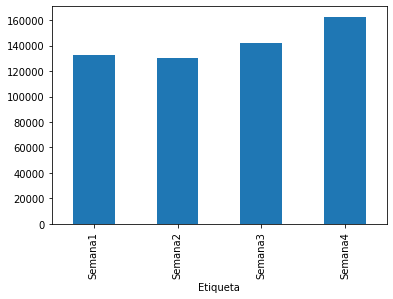

In [67]:
enero.plot(kind='bar')

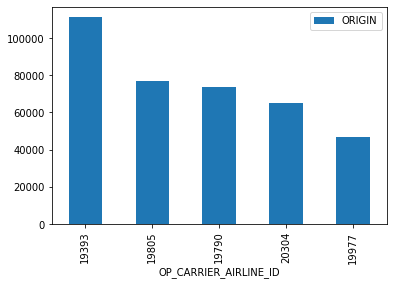

In [81]:
ej3=data.groupby(['OP_CARRIER_AIRLINE_ID'])['ORIGIN'].count()
ej31=pd.DataFrame(ej3)
by_origin = ej31.sort_values('ORIGIN',ascending=False)
MasAltos=by_origin.head()
MasAltos.plot(kind='bar')#En vez de barra con uno de burbujas